In [2]:
using SpecialFunctions, HDF5, CairoMakie 

Consider first the univariate case. Recall from the Suppllementary Material that
    $$ f(r;\alpha) = \sum_{k=1}^{3} \frac{(-1)^{k+1}\Gamma(k\alpha+1)\sin(\frac{k\alpha\pi}{2})}{\pi k!} r^{-k\alpha-1} + \mathcal{R}_4(r;\alpha) =\mathrel{\mathop:} \sum_{k=1}^{3} c^{\mathcal{S}}_k(\alpha) r^{-k\alpha-1} + \mathcal{R}_4(r;\alpha)  =\mathrel{\mathop:} \mathcal{S}_3(r;\alpha) + \mathcal{R}_4(r;\alpha),$$
with
    $$ |\mathcal{R}_4(r;\alpha)| \leq \frac{\Gamma(4\alpha+1)}{24\pi \sin(\pi_\alpha)^{4\alpha+1}}r^{-4\alpha-1} =\mathrel{\mathop:} c^{\mathcal{R}}_4(\alpha) r^{-4\alpha-1}, $$
where
    $$ \pi_\alpha = \frac{\pi}{2\max(\alpha,1)}.$$
    
Thus, for $r \geq 30$, we have the following estimates:
    $$ \Big|1 - \frac{f(r;\alpha)}{\mathcal{S}_3(r;\alpha)}\Big| = \Big|\frac{\mathcal{R}_4(r;\alpha)}{\mathcal{S}_3(r;\alpha)}\Big| \leq \frac{c^{\mathcal{R}}_4(\alpha) r^{-4\alpha-1}}{|c^{\mathcal{S}}_1(\alpha)|r^{-\alpha-1} - |c^{\mathcal{S}}_2(\alpha)|r^{-2\alpha-1} - |c^{\mathcal{S}}_3(\alpha)|r^{-3\alpha-1}} = \frac{c^{\mathcal{R}}_4(\alpha) r^{-3\alpha}}{|c^{\mathcal{S}}_1(\alpha)| - |c^{\mathcal{S}}_2(\alpha)|r^{-\alpha} - |c^{\mathcal{S}}_3(\alpha)|r^{-2\alpha}}, $$
assuming these calculations are valid in the sense of the latter denumerator being positive for $r = 30$ (the calculations below will show that this is indeed the case). With this assumption, the rightmost quantity is a decreasing function of $r \geq 30$, and we thus get a uniform error bound by investigating it with $r = 30$.

In [54]:
function S_1d(r,α,n)
    Σ = [
        (-1)^(k+1)*gamma(k*α+1)*sin(k*α*π/2)/factorial(k) * r^(-k*α-1)
        for k ∈ 1:n
    ]
    return Σ/π
end;

π_(α) = π/(2*max(α,1));

function R_1d(r,α,n)
    return gamma(n*α+1)/(π*factorial(n)*sin(π_(α))^(n*α+1)) * r^(-n*α-1)
end;

function endpoint_estimate_1d(α)
    r = 30
    n = 3
    Σ = S_1d(r,α,n)
    return R_1d(r,α,n+1)/( abs(Σ[1]) - sum([ abs(Σ[k]) for k ∈ 2:n ]) )
end;

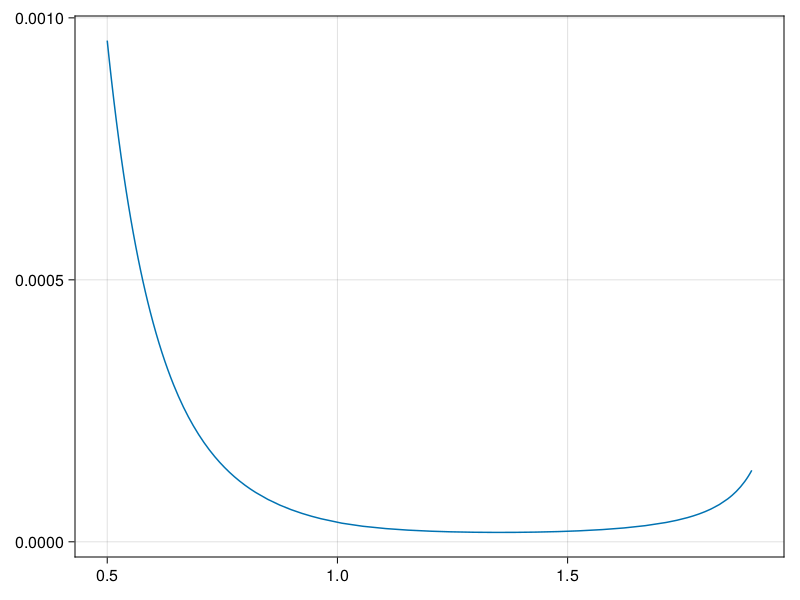

In [55]:
lines(.5..1.9, endpoint_estimate_1d)

We thus have the bound $0.00096$ for $0.5 \leq \alpha \leq 1.9$ for the above formulation of relative error (the relative error is almost an order of magnitude smaller still for $\alpha \geq 0.75$).

The calculations below perform the same analysis for the bivariate case. Here the remainder term involves some precomputed integrals; see the relevant section in the Supplementary Material.

In [56]:
function S_2d(r,α,n)
    Σ = [
        (-1)^(k+1)*2^(k*α)*gamma((k*α+2)/2)^2*sin(k*α*π/2)/factorial(k) * r^(-k*α-2)
        for k ∈ 1:n
    ]
    return Σ/(π^2)
end;

function R_2d(r,α,n)
    A_coarse = .5:.01:1.95
    i = findlast(isone, A_coarse .<= α)
    inte = h5read("/home/shared/Alpha-stable/estimates/2d/integrals_2d.h5","I∞",(i,1,1,n))
    #return gamma(n*α+1)/(π*factorial(n)*sin(π_(α))^(n*α+1)) * r^(-n*α-1)
    return inte/(2*π*factorial(n)) * r^(-n*α-2)
end;

function endpoint_estimate_2d(α)
    r = 30
    n = 3
    Σ = S_2d(r,α,n)
    return R_2d(r,α,n+1)/( abs(Σ[1]) - sum([ abs(Σ[k]) for k ∈ 2:n ]) )
end;

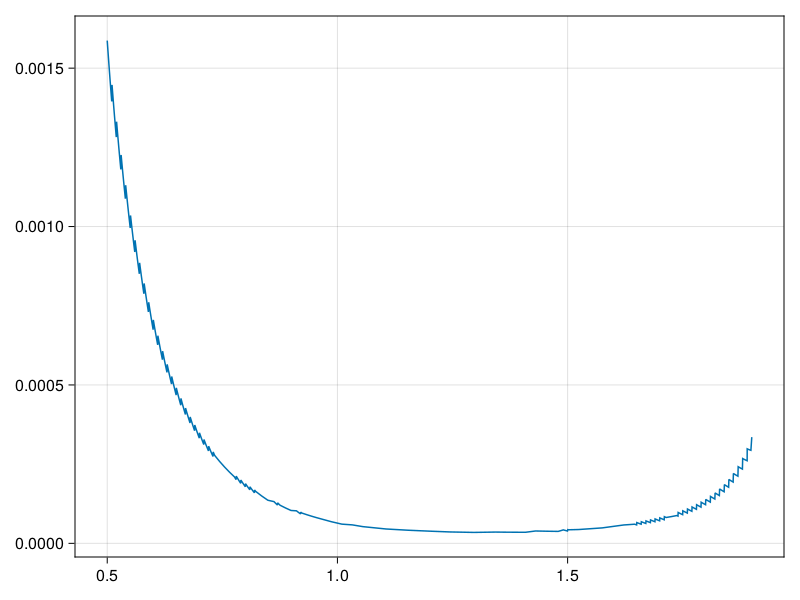

In [57]:
lines(.5..1.9, endpoint_estimate_2d)

Here we are thus looking at a relative error of $\leq 0.0016$ for $0.5 \leq \alpha \leq 1.9$, or $\leq 0.00034$ for $\alpha \geq 0.75$.